<a href="https://colab.research.google.com/github/sabiqsabry/bawt/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**BAWT (behavioural analysis via WhatsApp Text)**

People Behaviour via Chat Analysis Model using NLP

a people behavior via chat analysis model is a tool that is used to analyze and understand the behavior of individuals through the use of chat data. This can include analyzing the language and communication styles of individuals, as well as their interactions with others in a chat environment. The model can be used to identify patterns and trends in behavior, and to make predictions about how individuals may behave in the future. It can also be used to identify potential problems or issues that may arise within a group or organization, and to help design interventions or strategies to address these issues. Overall, a people behavior via chat analysis model can be a useful tool for understanding and managing human behavior in chat environments.

this was built for the module I am partaking in and presenting this as my final year project.

here are my details:

> NAME: Mohammad Sabiq Mohammad Sabry

> UOW_ID: 19219495

#1. Importing Libraries and Necessary Python Packages

The SoAn library was utilized to gather requirements through social analysis. WhatsApp messages were analyzed by extracting data using the SoAn library, which offered various analytical methods such as word frequency, word clouds, TF-IDF, and sentiment analysis. The library requires the .txt file to be in a specific format for analysis (the specified format is how the text file should be when exported on Android instead of an iOS device), and the helper function "import_data" is used to import the data and "preprocess_data" prepares it for analysis. After preprocessing, the data will have columns such as "Message_Raw" (raw message), "Message_Clean" (message without user and date), and "Message_Only_Text" (lowercased text with non-alphanumeric characters removed).

In [1]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks/bawt - chat behaviour analysis')  # Needed to import package in parent dir, remove this if you pip installed the package
import warnings
warnings.filterwarnings("ignore")
from soan.whatsapp import helper      # Helper to prepare the data
from soan.whatsapp import general     # General statistics
from soan.whatsapp import tf_idf      # To calculate TF-IDF
!pip install emoji==0.6.0
from soan.whatsapp import emoji       # To analyze emoji use
from soan.whatsapp import topic       # Topic modelling and summarization
from soan.whatsapp import sentiment   # Sentiment Analysis
from soan.whatsapp import wordcloud   # Create Word Clouds


!pip install matplotlib==3.2.1
!pip install seaborn==0.10.1
!pip install Pillow==7.2.0
!pip install scipy==1.5.2
!pip install numpy==1.19.1
!pip install pandas==1.1.1
!pip install regex==2020.7.14
!pip install palettable==3.3.0
!pip install requests==2.22.0
!pip install scikit_learn==0.23.2
!pip install wordcloud==1.8.0
!pip install nltk==3.5
!pip install vaderSentiment==3.3.2

%matplotlib inline

%load_ext autoreload
%autoreload 2

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in

#2. Prepare Data

The raw txt file received via WhatsApp is preprocessed by loading it into the dataframe. The following columns are generated:

**Message_Raw**: The original message from each user, including the date and name of the user.

**User**: The sender of the message, if it is from a user. If not, the message is removed from the dataframe.

**Message_Clean**: Only the message text, with all symbols included. No date or user name is included.

**Message_Only_Text**: Only the text content, in lowercase.

**Date**: The date in the format y/m/d.

In [3]:
df = helper.import_data('/content/drive/MyDrive/Colab Notebooks/bawt - chat behaviour analysis/chat/User 8/WhatsApp Chat with Jubada.txt')
df = helper.preprocess_data(df)
print(df)

# Change labels for anonymization - Leave this at False
if False:
    user_labels = {old: new for old, new in zip(sorted(df.User.unique()), ['User', 'Me'])}
    df.User = df.User.map(user_labels)

       index                                        Message_Raw    User  \
2          1  07/09/2018, 19:05 - Jubada: Ahhh no worries gi...  Jubada   
9484       0  07/09/2018, 19:05 - H: HEYY 😋 I'm doing the ch...       H   
9485       1  07/09/2018, 19:06 - H: Its okayyy ☺ hope u fin...       H   
3          2  07/09/2018, 19:06 - Jubada: I’ll see you at th...  Jubada   
9486       2               07/09/2018, 19:06 - H: C u then xx\n       H   
...      ...                                                ...     ...   
16110   6626                         31/01/2023, 22:28 - H: 1\n       H   
9483    9482            31/01/2023, 22:47 - Jubada: Tell meee\n  Jubada   
9480    9479  31/01/2023, 22:47 - Jubada: Awww I completely ...  Jubada   
9481    9480  31/01/2023, 22:47 - Jubada: Sweetest, thank yo...  Jubada   
9482    9481  31/01/2023, 22:47 - Jubada: https://www.justgi...  Jubada   

                                           Message_Clean  \
2      Ahhh no worries girl, thanks for

In [4]:
general.print_users(df)

#############
##  Users  ##
#############

Jubada
H


In [5]:
user = "User"
language = "English"

#3. Exploratory Data Analysis (EDA)

Now that the data has been preprocessed, it's possible to create some initial visualizations based on the frequency of messages. To plot the message frequency on a weekly basis, call the function "plot_messages".

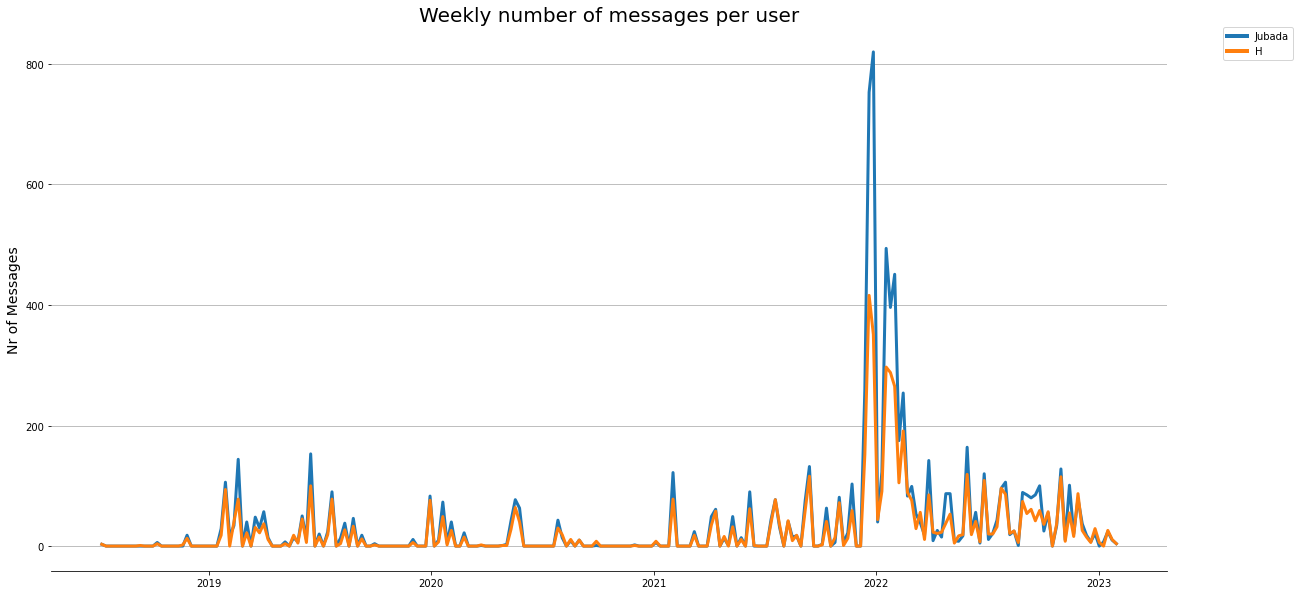

In [6]:
general.plot_messages(df, colors=None, trendline=False, savefig=False, dpi=100)

#3.1 Daily Activity

The visualization displays daily activity per individual in a spider plot, and the total activity in a histogram. It's important to note that the data is unstandardized, which means it also shows the volume of messages.

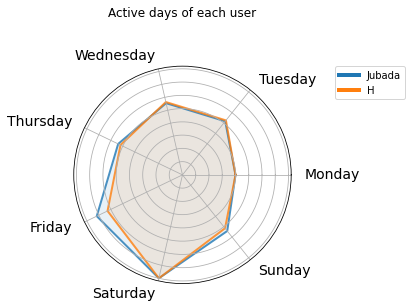

In [7]:
general.plot_day_spider(df, colors=None, savefig=False, dpi=100)

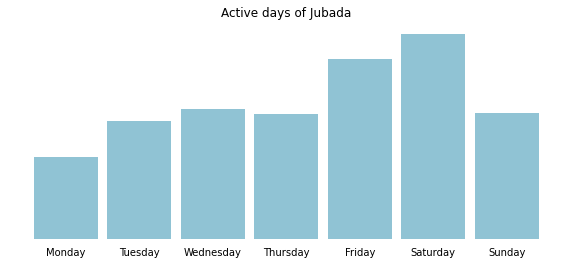

In [8]:
general.plot_active_days(df, savefig=False, dpi=100, user='Jubada')

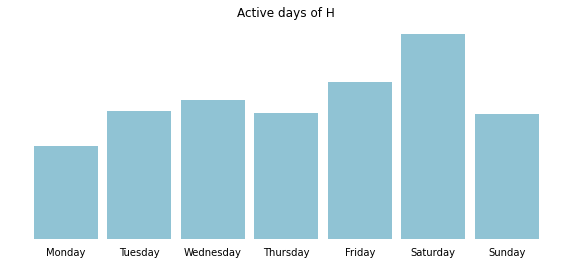

In [27]:
general.plot_active_days(df, savefig=False, dpi=100, user='H')

#3.2 Hourly Activity

The visualization demonstrates the times with the highest level of activity by identifying the period with the largest number of messages sent.

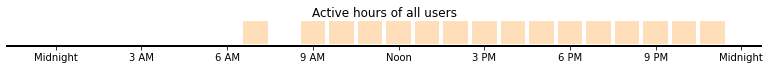

In [9]:
general.plot_active_hours(df, color='#ffdfba', savefig=False, dpi=100, user='All')

#3.3 Calendar Activity

Here you can view for which each year and day was the most concentrated times of texting were.

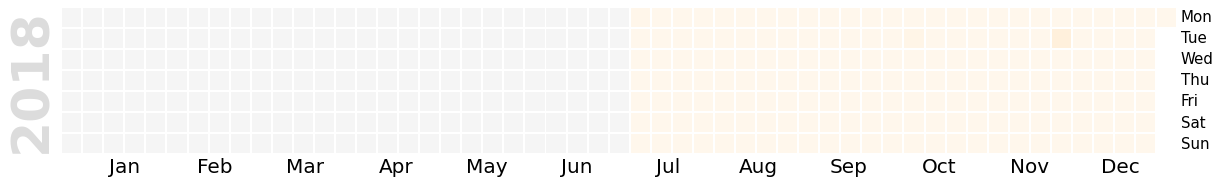

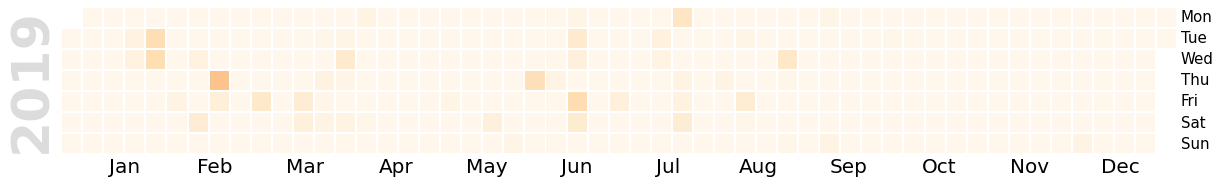

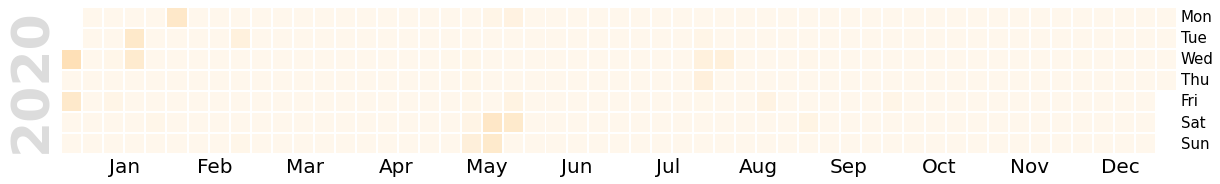

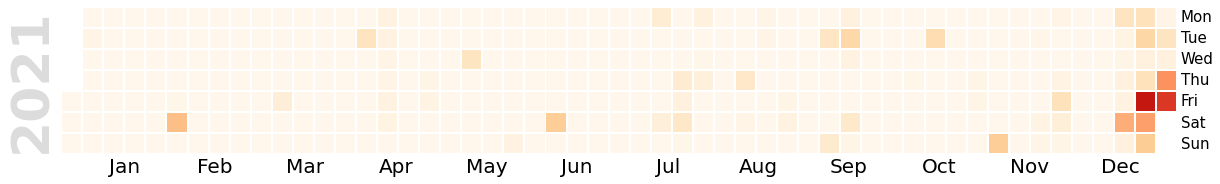

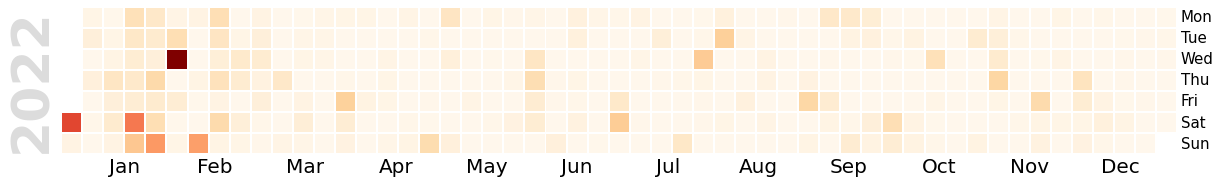

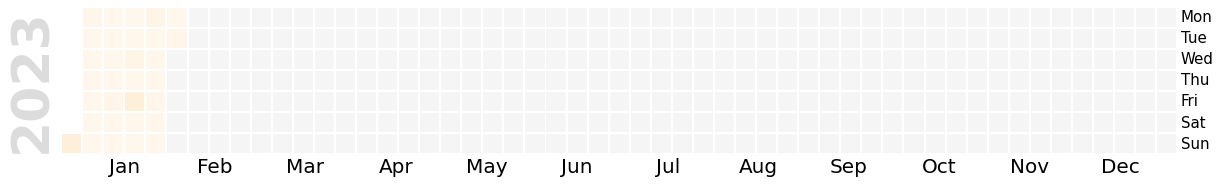

In [10]:
import pandas as pd
years = set(pd.DatetimeIndex(df.Date.values).year)

for year in years:
    general.calendar_plot(df, year=year, how='count', column='index')

#3.4 Response Time

By setting "keep_order" to "True", the order of messages in the dataframe is preserved, which is essential for calculating response times between messages. However, this method is more computationally intensive, which is why a separate function was created to handle it.

In [15]:
general.print_timing(df)

#####################################
##  Avg. Response Time in Minutes  ##
#####################################

H:                            49.6
Jubada:                       34.2

##############################
##  Nr. Initiated Messages  ##
##############################

H:                            64		(1.03% of all messages)
Jubada:                       49		(0.55% of all messages)


#4. Unique Words (TF-IDF)



#4.1 Build Count Vector

It generates the dataframe "counts," which holds information about each word mentioned in the conversations, and counts the number of times each user has used that word.

In [16]:
counts = tf_idf.count_words_per_user(df, sentence_column="Message_Only_Text", user_column="User")
counts = tf_idf.remove_stopwords(counts, language='english', column="Word")

#4.2 Unique Words

The following are three versions of TF-IDF created using SoAn. After thorough experimentation, it was determined that all three versions are quite similar, with Version C providing a desirable distribution of values for plotting purposes. In terms of content, all three versions convey a similar meaning.

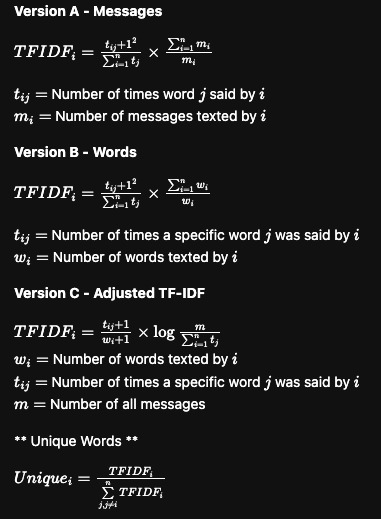

As you can see in the formula above it takes into account the TF-IDF scores of each person in the chat. Thus, it would also work for group chats which will be later infused in the model but so far it is only applicable between 2 chat users.

In [20]:
unique_words = tf_idf.get_unique_words(counts, df, version = 'C')
print(unique_words)

                                               Word  Jubada    H  \
2                                           worries      20    8   
3                                              girl      78   12   
4                                            thanks      66    3   
6                                           letting       3    5   
8                                              know     295  227   
...                                             ...     ...  ...   
6284                                          movee       1    0   
6285                                      relateeee       1    0   
6286                                          cupid       1    0   
6287                                     valentines       1    0   
6288  httpswwwjustgivingcomfundraisingmhboxhillhike       1    0   

      Jubada_TF_IDF    H_TF_IDF  Jubada_Unique  H_Unique  
2        132.075864   56.604229       2.333321  0.428574  
3        404.615462   66.582566       6.076898  0.164558  
4     

#4.3 Plot Words on Bar Chart

A horizontal histogram was employed to showcase the most distinctive words and their scores. Words are usually easier to read in a horizontal histogram format. Additionally, to enhance visual interest, the bars of the histogram can serve as a mask for any desired image.

In [21]:
tf_idf.print_users(df)

#############
##  Users  ##
#############

Jubada
H


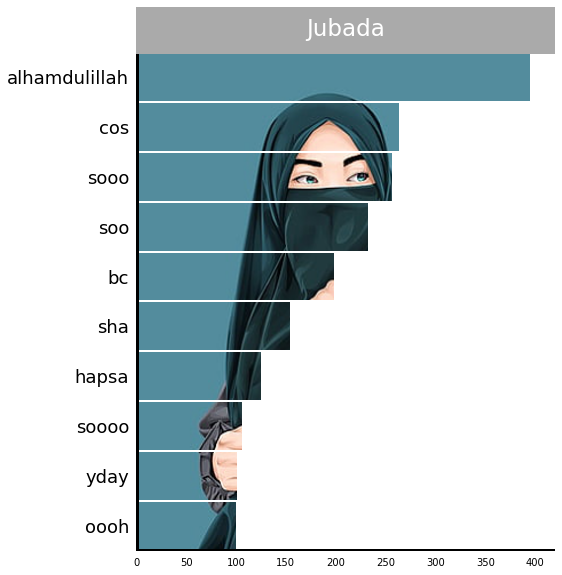

In [30]:
tf_idf.plot_unique_words(unique_words, 
                         user='Jubada', 
                         image_path='/content/drive/MyDrive/Colab Notebooks/bawt - chat behaviour analysis/images/user 1 - girl.jpeg', # use '../images/mask.png' to use the standard image
                         image_url=None, 
                         title= "Jubada", 
                         title_color="white", 
                         title_background='#AAAAAA', 
                         width=400, 
                         height=500)

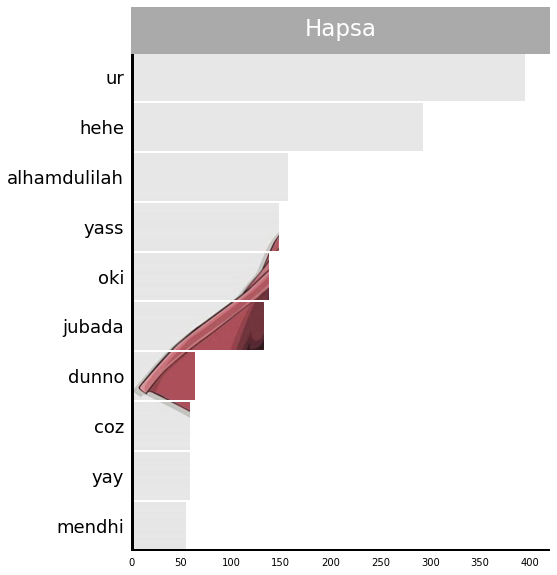

In [31]:
tf_idf.plot_unique_words(unique_words, 
                         user='H', 
                         image_path='/content/drive/MyDrive/Colab Notebooks/bawt - chat behaviour analysis/images/user 2 - girl.jpeg', # use '../images/mask.png' to use the standard image
                         image_url=None, 
                         title="Hapsa", 
                         title_color="white", 
                         title_background='#AAAAAA', 
                         width=400, 
                         height=500)

#5. Emoji Analysis 



#5.1 Prepare Data

To prepare the data, the following steps are taken:

1. Three new columns are created:

>a. "Emoji" which holds all the emojis in a message

>b. "Emoji_Counts" which counts the number of emojis in a message

>c. "Different_Emojis" which stores the emojis in a list for processing purposes.

2. A dictionary of dictionaries, "counts," is created to hold the count of each emoji per user.

3. A dictionary of dictionaries, "unique_emoji," is created to hold a uniqueness score for each emoji per user in comparison to other users.

In [33]:
# https://github.com/pandas-dev/pandas/issues/17892
temp = df[['index', 'Message_Raw', 'User', 'Message_Clean', 'Message_Only_Text']].copy()
temp = emoji.prepare_data(temp)

# Count all emojis
counts = emoji.count_emojis(temp, non_unicode=True)

# Get unique emojis
list_of_words = [word for user in counts for word in counts[user]]
unique_emoji = emoji.get_unique_emojis(temp, counts, list_of_words)
del temp

#5.2 Unique Emoji Identifier

Using the same TF-IDF algorithm used to find the most common words, the same algorithm was implemented on here to figure out the most common emoji's used by each user.



In [34]:
emoji.print_stats(unique_emoji, counts)

#############################
### Unique Emoji (TF-IDF) ###
#############################

Jubada
🤍 44.97551066471035
🙌🏽 22.48775533235527
😩 22.487755332355267

H
🤣 114.55122852095741
🙈 45.53589208286508
🤭 39.843905572506735

#########################
### Most Common Emoji ###
#########################

Jubada
😭 735
❤ 642
😂 227

H
😭 447
❤ 299
😂 237



#5.3 Plot Emoji on Bar Chart

Note: The frequently used emoji may not display correctly in matplotlib plots, and the issue remains unresolved at present.

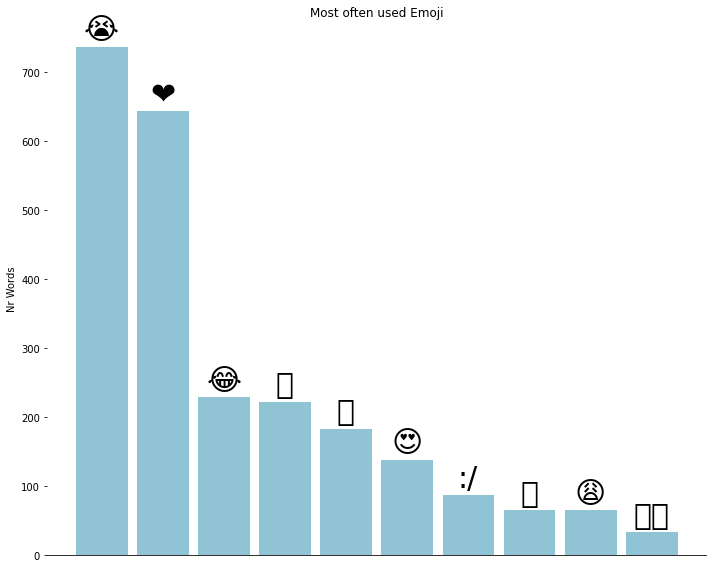

In [35]:
#Note: The frequently used emoji may not display correctly in matplotlib plots, and the issue remains unresolved at present.
#user 1
emoji.plot_counts(counts, user = "Jubada")

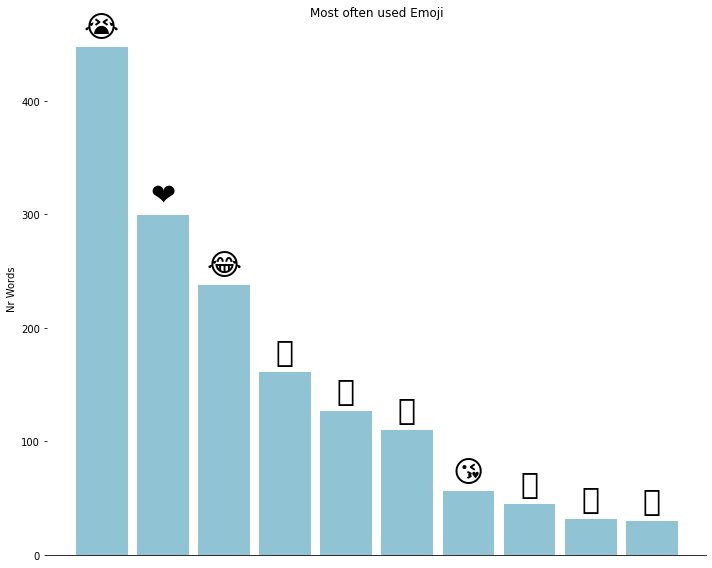

In [36]:
#Note: The frequently used emoji may not display correctly in matplotlib plots, and the issue remains unresolved at present.
#user 2
emoji.plot_counts(counts, user = "H")

#6. Topic Modelling

When it comes to topic modeling, there are numerous methods available. However, two of the most widely used methods are LDA (Latent Dirichlet Allocation) and NMF (Non-Negative Matrix Factorization). The implementation of both LDA and NMF in Sklearn was utilized due to its availability.

In [37]:
topic.topics(df, model='lda', language="english")

##############
### Jubada ###
##############


Topics in lda model:
Topic #0: time dont one get go right haha
Topic #1: hapsa know really cant cos feel see
Topic #2: im thats good allah soo sooo nice
Topic #3: like youre much love alhamdulillah xx day
Topic #4: ill make ia yeah take man keep

#########
### H ###
#########


Topics in lda model:
Topic #0: good okay think yess really hes also
Topic #1: dont xx get right coz ngl think
Topic #2: like ill day time hehe didnt ive
Topic #3: im got one thank sorry man wait
Topic #4: omg ur know jubada love gonna thats



In [39]:
topic.topics(df, model='nmf', language="english")

##############
### Jubada ###
##############


Topics in nmf model:
Topic #0: im happy gonna glad sorry proud excited
Topic #1: like dont know thats youre get much
Topic #2: alhamdulillah good better honestly feeling okay yesss
Topic #3: love much youuuu thank thanks xx youll
Topic #4: hapsa also omg look wait sorry awww

#########
### H ###
#########


Topics in nmf model:
Topic #0: omg yeah awww really amazing dw cute
Topic #1: jubada thank also tell sorry pathetic today
Topic #2: im sorry gonna like okay ok glad
Topic #3: know ur right dont let like lemme
Topic #4: love id thank hi ur one morning

